In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [11]:
import os
print(os.getcwd())

C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_malik


In [12]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'anaconda_projects', 'baboon.png', 'bikes.ipynb', 'data', 'Desktop', 'figure1.png', 'Filtering_&_Sharpening.ipynb', 'Flats.ipynb', 'goldhill.bmp', 'Image_Transformation.ipynb', 'Introduction_to_Histogram (1).ipynb', 'Introduction_to_Histogram.ipynb', 'laptops.ipynb', 'laptops4.ipynb', 'lenna.png', 'numpy.ipynb', 'PandasTaskUpdated.ipynb', 'pd_class.ipynb', 'R.jpg', 'SmartBuilding.ipynb', 'text.ipynb', 'TimeSeriesAnalysis.ipynb', 'turtle.jpg', 'turtle_data.csv', 'Typical_New_Zealand_scenic_walk_view.jpg', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'Untitled5.ipynb', 'Untitled6.ipynb', 'Walmart_task.ipynb']


In [14]:
img_path = "Typical_New_Zealand_scenic_walk_view.jpg"
img_bgr = cv2.imread(img_path)
assert img_bgr is not None, "Image not found!"
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


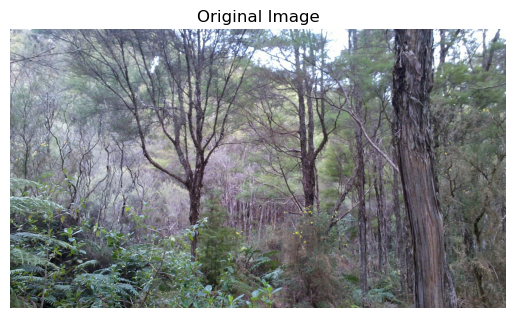

In [15]:
import matplotlib.pyplot as plt
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

Step 2: V-channel Equalized (HSV)


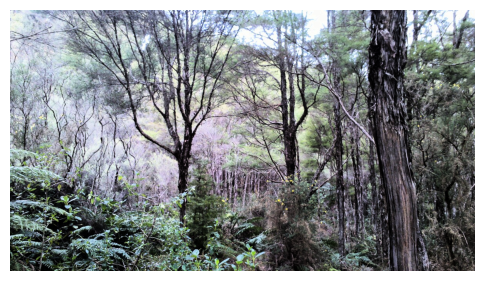

In [16]:
hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
v_eq = cv2.equalizeHist(v)
hsv_v_eq = cv2.merge([h, s, v_eq])
bgr_v_eq = cv2.cvtColor(hsv_v_eq, cv2.COLOR_HSV2BGR)
rgb_v_eq = cv2.cvtColor(bgr_v_eq, cv2.COLOR_BGR2RGB)

print("Step 2: V-channel Equalized (HSV)")
plt.figure(figsize=(6,4))
plt.imshow(rgb_v_eq)
plt.axis("off")
plt.show()

Step 3: Saturation Boost ×1.5


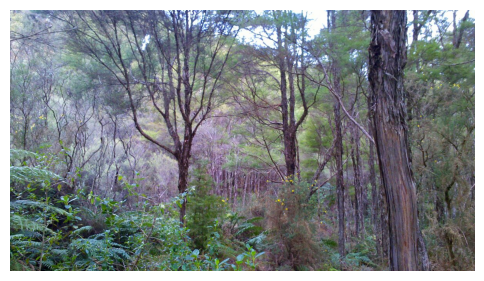

In [17]:
sat_factor = 1.5
hsv2 = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV).astype(np.float32)
h2, s2, v2 = cv2.split(hsv2)
s2 = np.clip(s2 * sat_factor, 0, 255)
hsv_sat = cv2.merge([h2, s2, v2]).astype(np.uint8)
bgr_sat = cv2.cvtColor(hsv_sat, cv2.COLOR_HSV2BGR)
rgb_sat = cv2.cvtColor(bgr_sat, cv2.COLOR_BGR2RGB)

print(f"Step 3: Saturation Boost ×{sat_factor}")
plt.figure(figsize=(6,4))
plt.imshow(rgb_sat)
plt.axis("off")
plt.show()

Step 4: Combined V-equalized + Saturation Boost ×1.5


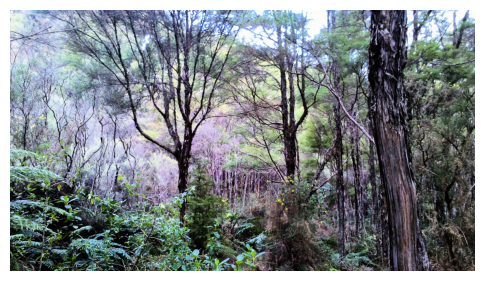

In [18]:
hsv3 = cv2.cvtColor(bgr_v_eq, cv2.COLOR_BGR2HSV).astype(np.float32)
h3, s3, v3 = cv2.split(hsv3)
s3 = np.clip(s3 * sat_factor, 0, 255)
hsv_comb = cv2.merge([h3, s3, v3]).astype(np.uint8)
bgr_comb = cv2.cvtColor(hsv_comb, cv2.COLOR_HSV2BGR)
rgb_comb = cv2.cvtColor(bgr_comb, cv2.COLOR_BGR2RGB)

print(f"Step 4: Combined V-equalized + Saturation Boost ×{sat_factor}")
plt.figure(figsize=(6,4))
plt.imshow(rgb_comb)
plt.axis("off")
plt.show()